In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [3]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [4]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [5]:
NOTEBOOK_NAME = 'mds_dhpc'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'compute_mds', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'compute_mds_3d', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_mds', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_mds_3d', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'get_euclid_dist', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [7]:
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [7]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [8]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc
    if sig_func is 'fishers':
        table = array1,array2
        sig_func = lambda x: sstats.fisher_exact(x, alternative='two-sided')
        p = sig_func(table)[-1]
        odds_ratio = sig_func(table)[0]
        print "odd's ratio =", odds_ratio, 'corrected p =',p*mcc
        

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [9]:
expo_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
pre_animals =  'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
post_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
post_hiatus_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'

In [10]:
delta_t05s = 0.5
t_start05s = -5.5 
t_stop05s = 10.5

delta_t1s = 1
t_start1s = -5 
t_stop1s  = 11 

delta_t15s = 1
t_start15s = -5.5 
t_stop15s = 10.5  

delta_t2s = 2
t_start2s = -4
t_stop2s  = 10

In [11]:
sessions = 'expo','pre','post','post_hiatus'
bins = ['05s','1s','15s','2s']
bin_ranges=[]
for tb in bins:
    if tb == '05s':
        div=0.5
    elif tb=='15s':
        div=1.0
    else:
        div=tb[:-1]
            #print range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
    #for t in range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div)))):
    bin_ranges.append(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
print bin_ranges

[32, 16, 16, 7]


In [12]:
for tb in bins:
    for sess in sessions:
        try:
            exec("patterns_%s_%s = dict(zip(%s_animals, [ut.load_variable('patterns_evs_%s_%s',\
                                                               '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in %s_animals]))"%(tb,sess,sess,tb,sess,sess))
            exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                             '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in %s_animals]))"%(sess,sess,sess,sess))
        except:
            print 'nope %s %s'%(tb,sess)

In [13]:
from sklearn.manifold import MDS
mds = MDS()

In [14]:
from sklearn.svm import SVC

In [15]:
import time

In [16]:
for sess in sessions:
    for tb,i in zip(bins,range(len(bins))):
        for t in range(bin_ranges[i]):
            exec('patterns_%s_%s_%s = {}'%(tb,sess,t))
            for ani in eval('%s_animals'%sess):
                try:
                    #print sess, tb, ani,
                    exec("patterns_%s_%s_%s['%s'] = patterns_%s_%s['%s'][%s]"%(tb,sess,t,ani,tb,sess,ani,t))
                except:
                    print 'NOPE',sess, tb, ani
                    continue

In [9]:
def compute_mds(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    md = mds.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb
    

In [18]:
%%time
n_loop = 100
n_patterns = 50

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(16):
        exec("patterns_1s_%s_%s_all_mds = np.r_[[compute_mds(patterns_1s_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(sess,t,sess,t,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
#for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
#compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
_,labels_comb = ut.combine_patterns(patterns_1s_pre_5, labels_pre,n_patterns=n_patterns,classes=[1,2,3,4])

0 expo 132.2 sec 1 expo 258.0 sec 2 expo 383.3 sec 3 expo 512.0 sec 4 expo 640.8 sec 5 expo 766.1 sec 6 expo 894.4 sec 7 expo 1020.8 sec 8 expo 1148.6 sec 9 expo 1275.5 sec 10 expo 1400.0 sec 11 expo 1525.1 sec 12 expo 1651.1 sec 13 expo 1780.8 sec 14 expo 1912.2 sec 15 expo 2038.1 sec 0 pre 2163.4 sec 1 pre 2290.5 sec 2 pre 2416.8 sec 3 pre 2542.6 sec 4 pre 2669.3 sec 5 pre 2799.9 sec 6 pre 2927.4 sec 7 pre 3056.6 sec 8 pre 3185.3 sec 9 pre 3313.8 sec 10 pre 3446.3 sec 11 pre 3578.5 sec 12 pre 3704.3 sec 13 pre 3838.7 sec 14 pre 3967.0 sec 15 pre 4099.9 sec 0 post 4227.1 sec 1 post 4355.4 sec 2 post 4496.0 sec 3 post 4629.7 sec 4 post 4758.8 sec 5 post 4883.8 sec 6 post 5013.9 sec 7 post 5140.3 sec 8 post 5269.9 sec 9 post 5396.7 sec 10 post 5526.0 sec 11 post 5652.7 sec 12 post 5782.1 sec 13 post 5911.0 sec 14 post 6038.6 sec 15 post 6165.7 sec 0 post_hiatus 6295.4 sec 1 post_hiatus 6424.7 sec 2 post_hiatus 6552.7 sec 3 post_hiatus 6681.8 sec 4 post_hiatus 6807.5 sec 5 post_hiatus 69

In [19]:
#get mean of loops
for sess in sessions:
    for t in range(16):
        exec("patterns_1s_%s_%s_all_mds_mean = np.mean([patterns_1s_%s_%s_all_mds[x] for x in \
              range(len(patterns_1s_%s_%s_all_mds))],axis=0)"%(sess,t,sess,t,sess,t))
        exec("patterns_1s_%s_%s_all_mds_std = np.std([patterns_1s_%s_%s_all_mds[x] for x in \
              range(len(patterns_1s_%s_%s_all_mds))],axis=0)"%(sess,t,sess,t,sess,t))

In [20]:
def compute_mds_3d(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    mds3d = MDS(n_components=3)
    md = mds3d.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb

In [21]:
%%time
n_loop = 100
n_patterns = 50

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(16):
        exec("patterns_1s_%s_%s_all_mds_3d = np.r_[[compute_mds_3d(patterns_1s_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(sess,t,sess,t,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
#for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
#compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
_,labels_comb_3d = ut.combine_patterns(patterns_1s_post_5, labels_pre,n_patterns=n_patterns,classes=[1,2,3,4])

0 expo 127.2 sec 1 expo 254.9 sec 2 expo 379.2 sec 3 expo 503.9 sec 4 expo 629.8 sec 5 expo 753.8 sec 6 expo 878.0 sec 7 expo 1004.5 sec 8 expo 1130.0 sec 9 expo 1255.0 sec 10 expo 1390.0 sec 11 expo 1513.9 sec 12 expo 1637.1 sec 13 expo 1760.5 sec 14 expo 1887.0 sec 15 expo 2015.8 sec 0 pre 2140.2 sec 1 pre 2264.9 sec 2 pre 2390.2 sec 3 pre 2512.7 sec 4 pre 2637.0 sec 5 pre 2761.7 sec 6 pre 2884.9 sec 7 pre 3011.5 sec 8 pre 3136.7 sec 9 pre 3258.8 sec 10 pre 3383.8 sec 11 pre 3507.5 sec 12 pre 3630.2 sec 13 pre 3754.8 sec 14 pre 3878.0 sec 15 pre 4003.9 sec 0 post 4126.9 sec 1 post 4248.4 sec 2 post 4371.8 sec 3 post 4497.8 sec 4 post 4621.4 sec 5 post 4744.9 sec 6 post 4870.6 sec 7 post 4993.5 sec 8 post 5116.2 sec 9 post 5240.9 sec 10 post 5367.0 sec 11 post 5495.8 sec 12 post 5621.0 sec 13 post 5746.6 sec 14 post 5870.7 sec 15 post 5993.3 sec 0 post_hiatus 6117.4 sec 1 post_hiatus 6242.7 sec 2 post_hiatus 6366.4 sec 3 post_hiatus 6489.9 sec 4 post_hiatus 6612.0 sec 5 post_hiatus 67

In [22]:
#get mean of loops
for sess in sessions:
    for t in range(16):
        exec("patterns_1s_%s_%s_all_mds_3d_mean = np.mean([patterns_1s_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_1s_%s_%s_all_mds_3d))],axis=0)"%(sess,t,sess,t,sess,t))
        exec("patterns_1s_%s_%s_all_mds_3d_std = np.std([patterns_1s_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_1s_%s_%s_all_mds_3d))],axis=0)"%(sess,t,sess,t,sess,t))

In [45]:
def plot_mds(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['#FF00D7','#B4109A','#00FFEC','#0E9D92']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, symbol1, mew=1, ms=3, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, symbol1, mew=1, ms=3, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, symbol2, mew=1, ms=3, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, symbol2, mew=1, ms=3, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 2
t = 5

#plot_mds(axs[0], np.mean(eval("patterns_tb_%s_pre_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[0], eval("patterns_1s_pre_%s_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[0].set_title('Pre')
#plot_mds(axs[1], np.mean(eval("patterns_tb_%s_post_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[1], eval("patterns_1s_post_%s_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[1].set_title('Post')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)
lim = 20
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def plot_mds_3d(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['lightskyblue','steelblue','indianred','maroon']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]
    z = postrenew_patterns_all_mds[:, 2]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    CS1z = [z[labels_comb==1].mean()]
    CS2z = [z[labels_comb==2].mean()]
    CS3z = [z[labels_comb==3].mean()]
    CS4z = [z[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, CS1z, symbol1, mew=1, ms=5, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, CS2z, symbol1, mew=1, ms=5, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, CS3z, symbol2, mew=1, ms=5, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, CS4z, symbol2, mew=1, ms=5, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1], z[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2], z[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3], z[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4], z[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    #ax.set_zlim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_zticks(())

#fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 5
lim = 10

fig = pl.figure(figsize=(4, 2))

for i,p in zip([1,2],[0,1]):
       
    ax = fig.add_subplot(1, 2, p+1, projection='3d')
    
    ax.view_init(azim=10, elev=20)

    plot_mds_3d(ax, eval("patterns_1s_%s_%s_all_mds_3d[which_run]"%(sessions[i],t)), labels_comb_3d, symbol1='o',symbol2='o',
                with_background=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

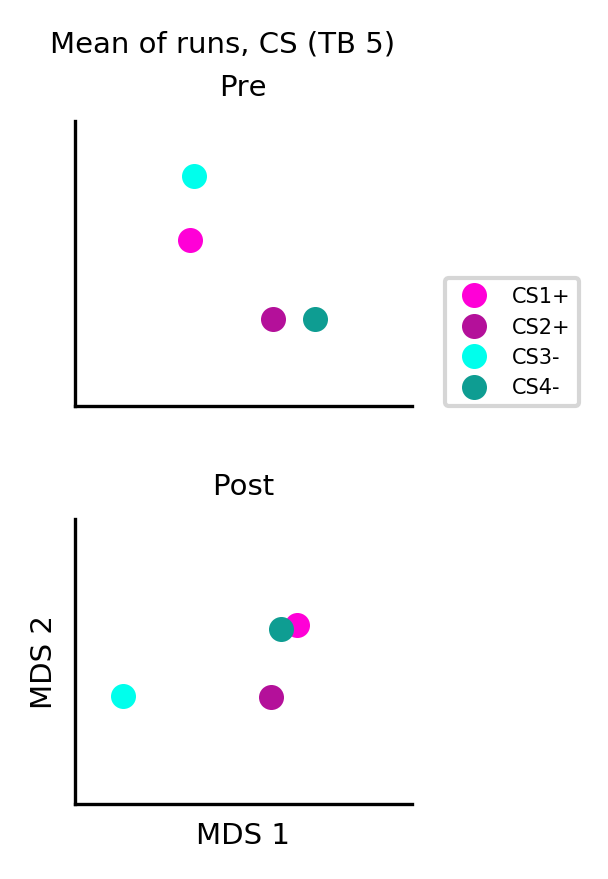

In [25]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 5

#plot_mds(axs[0], np.mean(eval("patterns_tb_%s_pre_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[0], eval("patterns_1s_pre_%s_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
axs[0].set_title('Pre')
#plot_mds(axs[1], np.mean(eval("patterns_tb_%s_post_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[1], eval("patterns_1s_post_%s_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
axs[1].set_title('Post')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of runs, CS (TB "+str(t)+')',fontsize=7)
lim = 4.5
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [12]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.4,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=6)
    return sig_value, p

fig, axs = pl.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)

for r in range(10):
    plot_mds(axs[0][r], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(10,20),range(10)):
    plot_mds(axs[1][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(20,30),range(10)):
    plot_mds(axs[2][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')    
for r,c in zip(range(30,40),range(10)):
    plot_mds(axs[3][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')   
for r,c in zip(range(40,50),range(10)):
    plot_mds(axs[4][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(50,60),range(10)):
    plot_mds(axs[5][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(60,70),range(10)):
    plot_mds(axs[6][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(70,80),range(10)):
    plot_mds(axs[7][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o') 
for r,c in zip(range(80,90),range(10)):
    plot_mds(axs[8][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(90,100),range(10)):
    plot_mds(axs[9][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
    
axs[0][0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(-1.3, 0.4))

lim = 30
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

axs[0][0].set_xlabel('MDS 1')
axs[0][0].set_ylabel('MDS 2')
pl.suptitle("Late, CS period (dCA1)",y=.91,fontsize=12)


fig.savefig('../img/%s_mds_all_runs_CS.jpg'%NOTEBOOK_NAME, bbox='tight')

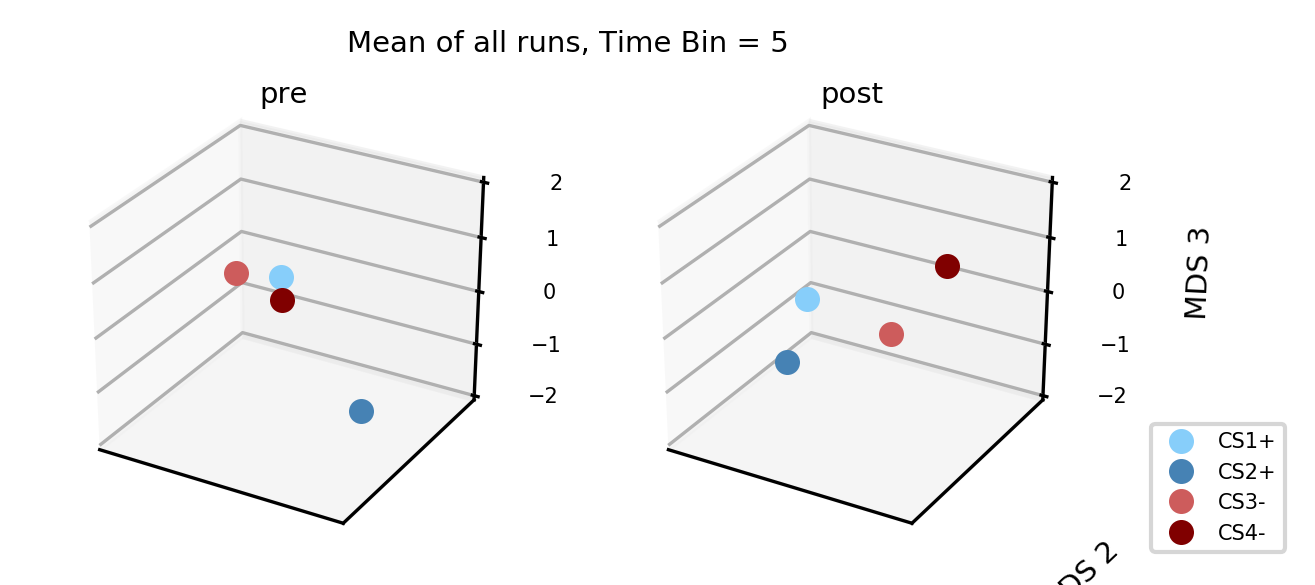

In [27]:
#fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 5
lim = 2

fig = pl.figure(figsize=(4, 2))

for i,p in zip([1,2],[0,1]):
       
    ax = fig.add_subplot(1, 2, p+1, projection='3d')
    
    #ax.view_init(azim=10, elev=20)

    plot_mds_3d(ax, eval("patterns_1s_%s_%s_all_mds_3d_mean"%(sessions[i],t)), labels_comb_3d, symbol1='o',symbol2='o',
                with_background=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs, Time Bin = "+str(t),fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

## find euclidian distances between data points

In [13]:
from scipy.spatial import distance

def get_euclid_dist(prepost_patterns_all_mds, labels_comb):

    x = prepost_patterns_all_mds[:, 0]
    y = prepost_patterns_all_mds[:, 1]
    
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    
    CS1 = (CS1x,CS1y)
    CS2 = (CS2x,CS2y) 
    CS3 = (CS3x,CS3y) 
    CS4 = (CS4x,CS4y)
    
    dist_CS1_CS2 = distance.euclidean(CS1,CS2)
    dist_CS1_CS3 = distance.euclidean(CS1,CS3)
    dist_CS1_CS4 = distance.euclidean(CS1,CS4)
    dist_CS2_CS3 = distance.euclidean(CS2,CS3)
    dist_CS2_CS4 = distance.euclidean(CS2,CS4)
    dist_CS3_CS4 = distance.euclidean(CS3,CS4)
    
    return dist_CS1_CS2, dist_CS1_CS3, dist_CS1_CS4, dist_CS2_CS3, dist_CS2_CS4, dist_CS3_CS4

In [29]:
for sess in sessions:
    for t in range(16):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_1s_%s_%s = {}"%(sess,t,comp[0]+comp[1]))
        for w in range(len(eval("patterns_1s_%s_%s_all_mds"%(sess,t)))):
                exec("d_%s_1s_%s_CS1CS2[w], d_%s_1s_%s_CS1CS3[w], d_%s_1s_%s_CS1CS4[w], d_%s_1s_%s_CS2CS3[w], d_%s_1s_%s_CS2CS4[w], d_%s_1s_%s_CS3CS4[w] = \
                get_euclid_dist(patterns_1s_%s_%s_all_mds[w], labels_comb)"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))

In [30]:
for sess in sessions:
    for t in range(16):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_1s_%s_%s_app = []"%(sess,t,comp[0]+comp[1]))
            for w in range(len(eval("patterns_1s_%s_%s_all_mds"%(sess,t)))):
                exec("d_%s_1s_%s_%s_app.append(d_%s_1s_%s_%s[w])"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
            exec("d_%s_1s_%s_CSpvsCSm_app = []"%(sess,t))
            for w in range(len(eval("patterns_1s_%s_%s_all_mds"%(sess,t)))):
                exec("d_%s_1s_%s_CSpvsCSm_app.append(np.mean([d_%s_1s_%s_CS1CS3[w], d_%s_1s_%s_CS1CS4[w], d_%s_1s_%s_CS2CS3[w], \
                      d_%s_1s_%s_CS2CS4[w]]))"%(sess,t,sess,t,sess,t,sess,t,sess,t))

In [31]:
##get mean of loops
#for sess in sessions:
#    for t in range(5,13):
#        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
#            exec("d_%s_tb_%s_%s_mean = []"%(sess,t,comp[0]+comp[1]))
#            q=0
#            for x in range(n_loop):
#                q = eval("d_%s_tb_%s_%s[x]"%(sess,t,comp[0]+comp[1]))+q
#            exec("d_%s_tb_%s_%s_mean = q/n_loop"%(sess,t,comp[0]+comp[1]))
#        exec("d_%s_tb_%s_CSpvsCSm_mean = (d_%s_tb_%s_CS1CS3_mean + d_%s_tb_%s_CS1CS4_mean + d_%s_tb_%s_CS2CS3_mean + \
#              d_%s_tb_%s_CS2CS4_mean)/4"%(sess,t,sess,t,sess,t,sess,t,sess,t))

In [32]:
#get mean of loops
for sess in sessions:
    for t in range(16):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_1s_%s_%s_mean = np.mean([d_%s_1s_%s_%s[x] for x in d_%s_1s_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
            exec("d_%s_1s_%s_%s_std = np.std([d_%s_1s_%s_%s[x] for x in d_%s_1s_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
        exec("d_%s_1s_%s_CSpvsCSm_mean = np.mean([[d_%s_1s_%s_CS1CS3[x], d_%s_1s_%s_CS1CS4[x], d_%s_1s_%s_CS2CS3[x], \
              d_%s_1s_%s_CS2CS4[x]] for x in d_%s_1s_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))
        exec("d_%s_1s_%s_CSpvsCSm_std = np.std([[d_%s_1s_%s_CS1CS3[x], d_%s_1s_%s_CS1CS4[x], d_%s_1s_%s_CS2CS3[x], \
              d_%s_1s_%s_CS2CS4[x]] for x in d_%s_1s_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))

In [33]:
np.array(list(d_post_1s_0_CS1CS2.values()))

array([  1.3207838 ,   1.79843641,   5.73586718,   4.13115576,
         4.32979743,   0.58968495,   1.80514145,   1.572948  ,
         7.52334496,   8.95858317,   5.79363099,   2.005345  ,
         3.01597076,   4.63790561,   3.40100337,   2.24198957,
         5.99343961,   9.63639761,   5.76971743,   1.84031057,
         6.40702941,   1.9035602 ,   5.74781821,   6.81966893,
         5.07018268,   3.76252593,   8.16023044,   8.07396627,
         1.60296078,   5.74441385,   5.15337442,   0.24559394,
         7.68207023,   4.49291738,   8.98205582,   5.46948831,
         7.6283946 ,   5.13563253,   3.39325546,   3.99183156,
         3.06688952,   5.83947782,   7.80596268,   2.25006923,
         4.89290191,   4.3371539 ,   2.52272962,   2.88769003,
         8.81034511,   5.15731197,  10.45761519,   5.2230327 ,
         1.9147527 ,   2.40043796,   4.84522222,   4.74999892,
         1.60457487,   2.35243701,   1.50212255,   2.92597451,
         5.27054923,   5.39401617,   5.45310784,   2.93

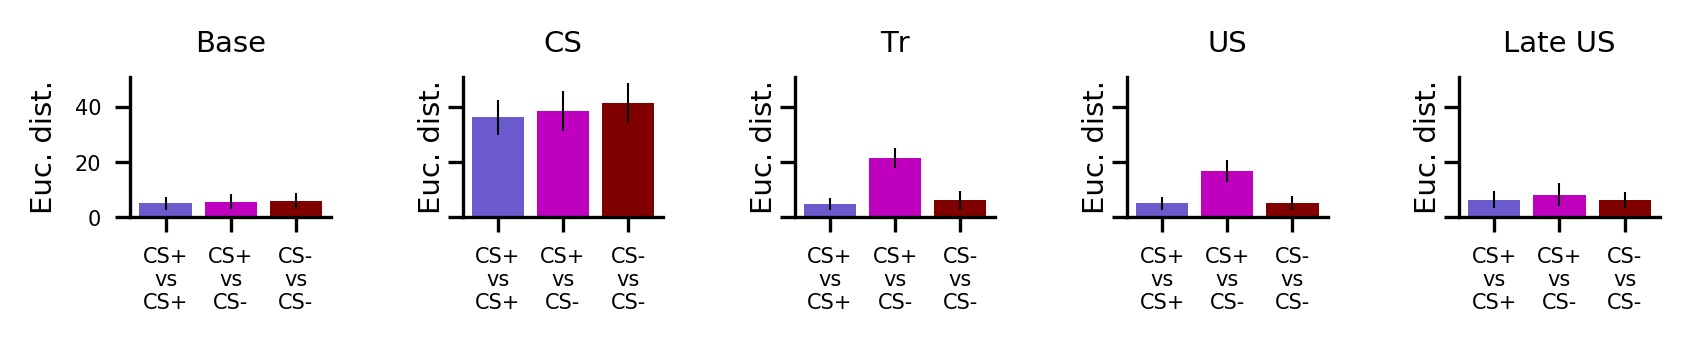

In [34]:
fig,ax = pl.subplots(1,5,figsize=(6,1.5),sharex=True,sharey=True)
colors='slateblue','m','maroon'

for t,c,ti in zip([4,5,8,10,12],range(len(range(5))),['Base','CS','Tr','US','Late US']):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            ax[c].bar(f,eval("d_post_1s_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_1s_%s_%s_std"%(t,comp[0]+comp[1])))
            
            ax[c].set_xticks(range(3))
            ax[c].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            ax[c].set_ylabel('Euc. dist.')
            ax[c].set_title(ti)
fig.tight_layout(pad=4)
        

fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("[np.mean([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         yerr=eval("[np.std([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         color=colors[f])
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(3))
            ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

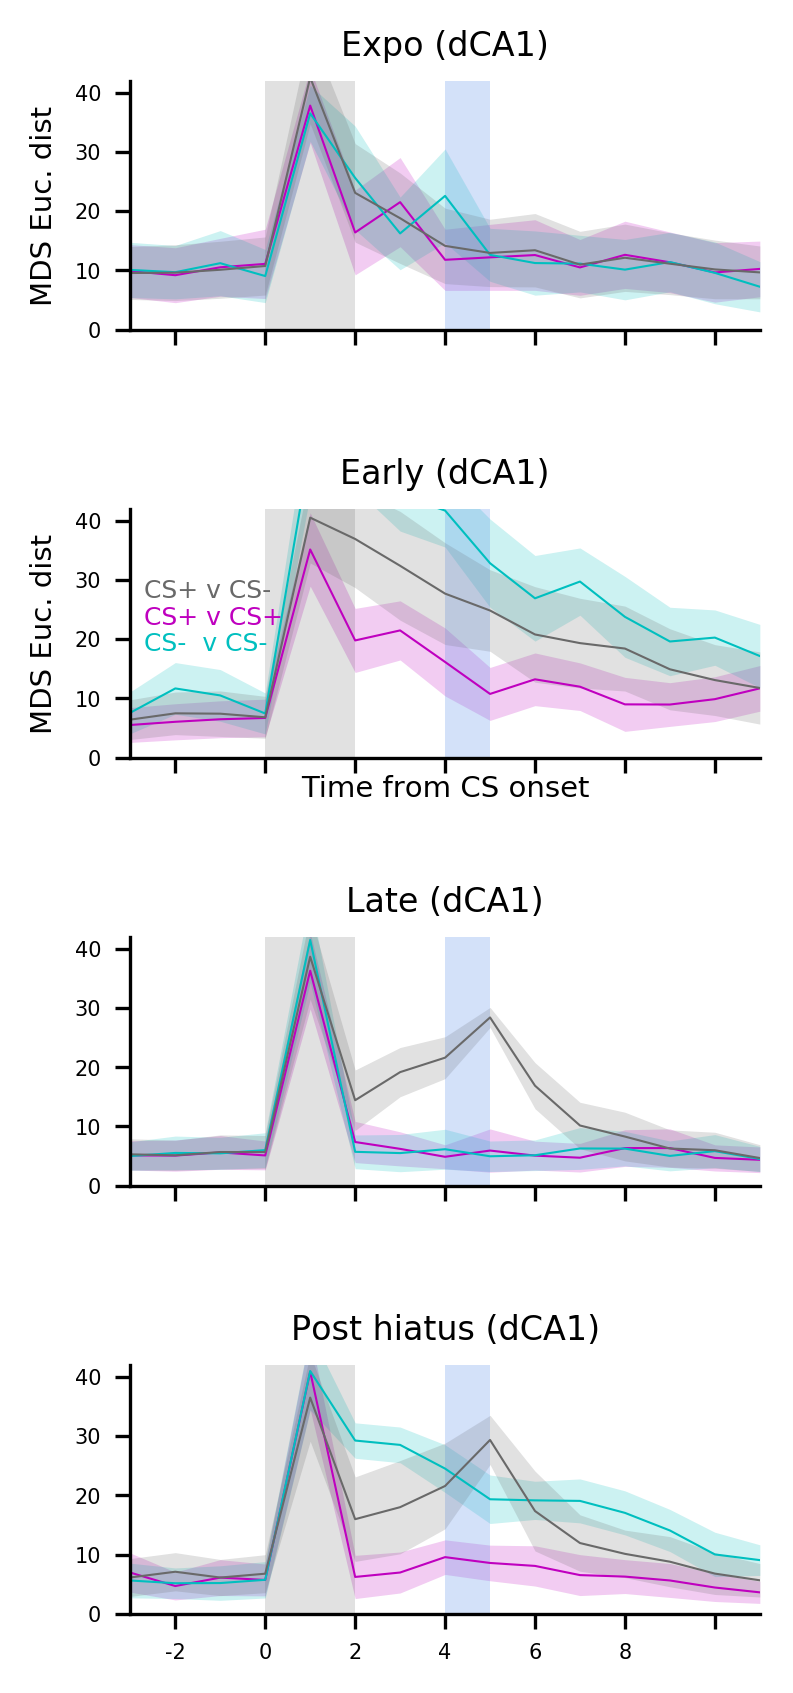

In [38]:
colors='m','c','dimgray'
listy='-','-','-'
tb=range(16)

fig,ax = pl.subplots(4,1,figsize=(3,6),sharex=True,sharey=True)

for sess,r in zip(sessions,[0,1,2,3]):
    for comp,f,comp_la in zip((['CS1','CS2'], ['CS3','CS4'],['CSpvs','CSm']),range(3),('CS+ vs CS+','CS-  vs CS-','CS+ vs CS-')):
        ax[r].plot([(t) for t in tb],[eval("d_%s_1s_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb],color=colors[f],
                   linestyle=listy[f], label=comp_la)
        m = np.array([eval("d_%s_1s_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb])
        s = np.array([eval("d_%s_1s_%s_%s_std"%(sess,t,comp[0]+comp[1])) for t in tb])
        ax[r].fill_between([(t) for t in tb],m-s,m+s,alpha=0.2,color=colors[f],linewidth=0)
        pt.plot_period_bar(ax[r], 0, start_end=(4, 6), color='k', delta_y=100,alpha=.04)
        pt.plot_period_bar(ax[r], 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.1)

#ax[1].legend(fontsize=4.5)
ax[0].set_title('Expo (dCA1)',fontsize=8)
ax[1].set_title('Early (dCA1)',fontsize=8)
ax[2].set_title('Late (dCA1)',fontsize=8)
ax[3].set_title('Post hiatus (dCA1)',fontsize=8)
ax[0].set_ylabel('MDS Euc. dist')
ax[1].set_ylabel('MDS Euc. dist')
#ax[0].set_xlabel('Time from CS onset')
ax[1].set_xlabel('Time from CS onset')
tick_labels = range(-4,10,2)
ticks = range(0,len(tb),2)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_labels)
ax[0].set_ylim(0,42)
ax[0].set_xlim(1,len(tb)-1)
ax[1].text(1.3,27,'CS+ v CS-',color='dimgrey',fontsize=6)
ax[1].text(1.3,22.5,'CS+ v CS+',color='m',fontsize=6)
ax[1].text(1.3,18,'CS-  v CS-',color='c',fontsize=6)

#ax[1].tick_params(axis='x',length=.5,bottom=False)

    #for t,c in zip(range(5,13),range(len(range(5,13)))):
    #    for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
    #        ax[c][r].bar(f,eval("d_%s_1s_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_1s_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

    #        ax[c][r].set_xticks(range(3))
    #        ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
    #        ax[c][r].set_ylabel('Euc. dist.')
    #        ax[c][r].set_title('1s = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)

#fig.savefig('../figures/%s_euclid_1ss.pdf'%NOTEBOOK_NAME, bbox='tight')

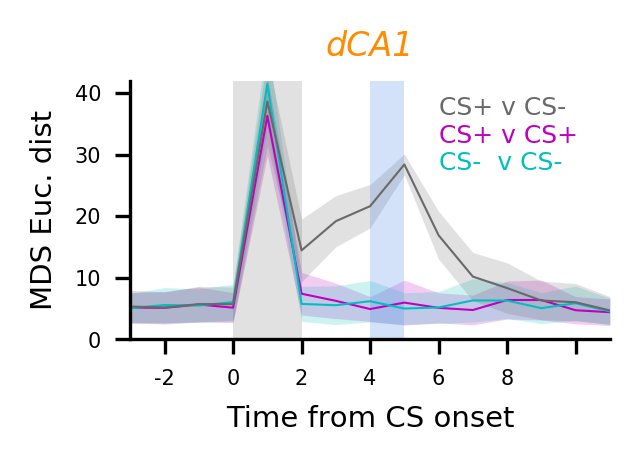

In [42]:
colors='m','c','dimgray'
listy='-','-','-'
tb=range(16)
sess='post'
fig,ax = pl.subplots(1,1,figsize=(2.5,1.9),sharex=True,sharey=True)

for comp,f,comp_la in zip((['CS1','CS2'], ['CS3','CS4'],['CSpvs','CSm']),range(3),('CS+ vs CS+','CS-  vs CS-','CS+ vs CS-')):
        ax.plot([(t) for t in tb],[eval("d_%s_1s_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb],color=colors[f],
                   linestyle=listy[f], label=comp_la)
        m = np.array([eval("d_%s_1s_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb])
        s = np.array([eval("d_%s_1s_%s_%s_std"%(sess,t,comp[0]+comp[1])) for t in tb])
        ax.fill_between([(t) for t in tb],m-s,m+s,alpha=0.2,color=colors[f],linewidth=0)
        pt.plot_period_bar(ax, 0, start_end=(4, 6), color='k', delta_y=100,alpha=.04)
        pt.plot_period_bar(ax, 0, start_end=(8, 9), color='cornflowerblue', delta_y=100, alpha=.1)

#ax[1].legend(fontsize=4.5)
ax.set_title('dCA1',fontsize=8,fontstyle='italic',color='darkorange')
ax.set_ylabel('MDS Euc. dist')
ax.set_ylabel('MDS Euc. dist')
#ax[0].set_xlabel('Time from CS onset')
ax.set_xlabel('Time from CS onset')
tick_labels = range(-4,10,2)
ticks = range(0,len(tb),2)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_ylim(0,42)
ax.set_xlim(1,len(tb)-1)
ax.text(10,36.5,'CS+ v CS-',color='dimgrey',fontsize=6)
ax.text(10,32,'CS+ v CS+',color='m',fontsize=6)
ax.text(10,27.5,'CS-  v CS-',color='c',fontsize=6)

#ax[1].tick_params(axis='x',length=.5,bottom=False)

    #for t,c in zip(range(5,13),range(len(range(5,13)))):
    #    for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
    #        ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

    #        ax[c][r].set_xticks(range(3))
    #        ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
    #        ax[c][r].set_ylabel('Euc. dist.')
    #        ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)

#fig.savefig('../figures/%s_euclid_tbs_Late.pdf'%NOTEBOOK_NAME, bbox='tight')

# left off here

In [14]:
def plot_mds_trajectory(ax, labels_comb, session='post', tb = range(5,13), al = range(8), which_run=0, symbol1='o', symbol2='^',
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 1]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
    alpha_levels = np.linspace(.3,.9,len(tb))
    #Pl1y = (CS1y[tb[0]],CS1y[tb[1]],CS1y[tb[2]],CS1y[tb[3]])
    #Pl1x = (CS1x[tb[0]],CS1x[tb[1]],CS1x[tb[2]],CS1x[tb[3]])
    #Pl1c = ([0,1,1,.2],[0,1,1,.4],[0,1,1,.6],[0,1,1,.8])
    #colors = cmap(np.linspace(0.1, 0.9, all_traces.shape[1]))
    #ax.scatter(x-xyinit[0], y-xyinit[1], s=2, linewidths=0, edgecolors=colors, c=colors, zorder=19)
    if CSp == True:
        ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], color = colors[0], zorder=1, alpha=.3, label='CS1+')
        ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], color = colors[1], zorder=1, alpha=.3, label='CS2+')
        #ax.plot(Pl1x,Pl1y,color = 'k')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS1x[t], CS1y[t], symbol1, mew=0, ms=2, color = colors[0], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS2x[t], CS2y[t], symbol1, mew=0, ms=2, color = colors[1], alpha=alpha_levels[z], zorder=2)
    if CSm == True:
        ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb],  linestyle='--', color = colors[2], zorder=1, alpha=.3, label='CS3-')
        ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb],  linestyle='--', color = colors[3], zorder=1, alpha=.3, label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

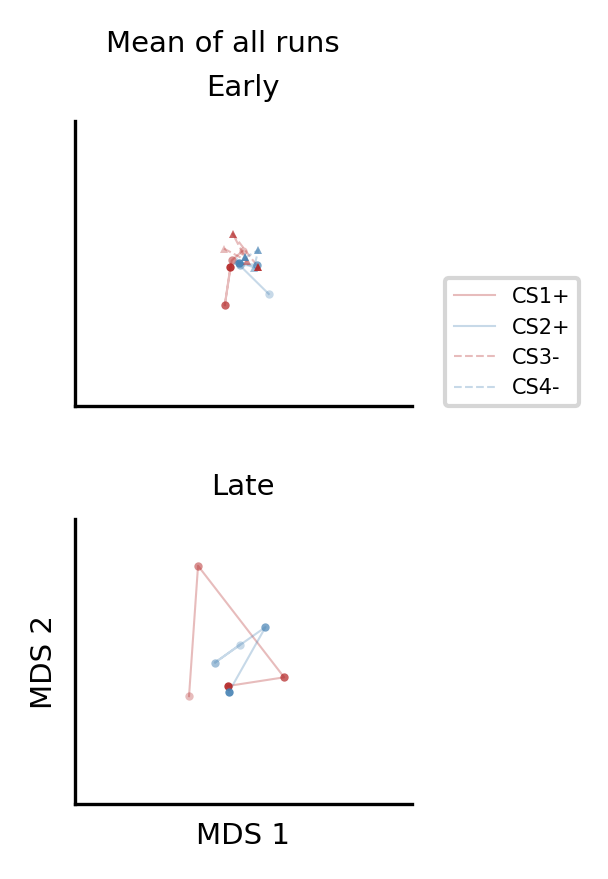

In [933]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = [6,8,10,12], which_run=1, symbol1='o',symbol2='^')
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = [6,8,10,12], which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

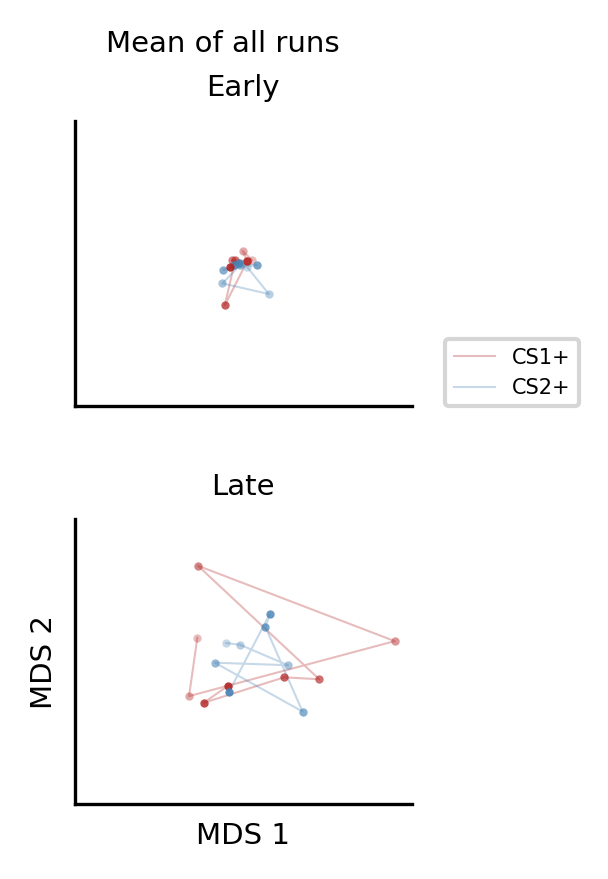

In [934]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(5,13), which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(5,13), which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

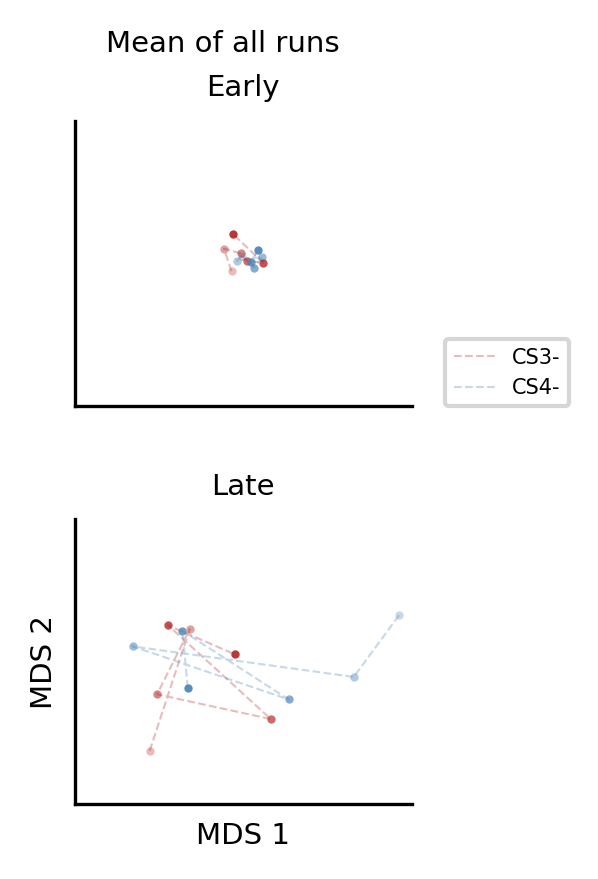

In [935]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(5,11), which_run=1, symbol1='o',symbol2='o',CSp=False)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(5,11), which_run=1, symbol1='o',symbol2='o',CSp=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce

def plot_mds_trajectory_3d(ax, labels_comb, session='post', tb = range(5,13), symbol1='o', symbol2='^',cmap=pl.cm.gray_r,
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    z={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    CS1z = {}
    CS2z = {}
    CS3z = {}
    CS4z = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 1]"%(t,session))
        z[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 2]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
        CS1z[t] = [z[t][labels_comb==1].mean()]
        CS2z[t] = [z[t][labels_comb==2].mean()]
        CS3z[t] = [z[t][labels_comb==3].mean()]
        CS4z[t] = [z[t][labels_comb==4].mean()]
    
    Pl1x=[]
    Pl1y=[]
    Pl1z=[]
    Pl2x=[]
    Pl2y=[]
    Pl2z=[]
    Pl3x=[]
    Pl3y=[]
    Pl3z=[]
    Pl4x=[]
    Pl4y=[]
    Pl4z=[]
    for t in tb:
        Pl1x.append(CS1x[t])
        Pl1y.append(CS1y[t])
        Pl1z.append(CS1z[t])
        Pl2x.append(CS2x[t])
        Pl2y.append(CS2y[t])
        Pl2z.append(CS2z[t])
        Pl3x.append(CS3x[t])
        Pl3y.append(CS3y[t])
        Pl3z.append(CS3z[t])
        Pl4x.append(CS4x[t])
        Pl4y.append(CS4y[t])
        Pl4z.append(CS4z[t])
    Pl1x = reduce(lambda x,y: x+y,Pl1x)
    Pl1y = reduce(lambda x,y: x+y,Pl1y)
    Pl1z = reduce(lambda x,y: x+y,Pl1z)
    Pl2x = reduce(lambda x,y: x+y,Pl2x)
    Pl2y = reduce(lambda x,y: x+y,Pl2y)
    Pl2z = reduce(lambda x,y: x+y,Pl2z)
    Pl3x = reduce(lambda x,y: x+y,Pl3x)
    Pl3y = reduce(lambda x,y: x+y,Pl3y)
    Pl3z = reduce(lambda x,y: x+y,Pl3z)
    Pl4x = reduce(lambda x,y: x+y,Pl4x)
    Pl4y = reduce(lambda x,y: x+y,Pl4y)
    Pl4z = reduce(lambda x,y: x+y,Pl4z)
    
    alpha_levels = np.linspace(.2,.9,len(tb))
    if CSp == True:
        #ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], [CS1z[t] for t in tb], '-', color = colors[0], zorder=1,alpha=.4)
        #ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], [CS2z[t] for t in tb], '-', color = colors[1], zorder=1,alpha=.4)
        ax.plot(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0],color = 'blue', alpha=.2, label='CS1+')
        ax.plot(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0],color = 'red',  alpha=.2, label='CS2+')
        #for t,z in zip(tb,range(len(tb))):
        cmap = pl.cm.Blues
        colorz = cmap(np.linspace(0.2, 0.9,len(tb)))
        ax.scatter(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl1x[-1]-Pl1x[0]],[Pl1y[-1]-Pl1y[0]],[Pl1z[-1]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='blue', ms=5, lw=0.5)
        
        cmap = pl.cm.Reds
        colorz = cmap(np.linspace(0.1, 0.9,len(tb)))
        ax.scatter(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl2x[-1]-Pl2x[0]],[Pl2y[-1]-Pl2y[0]],[Pl2z[-1]-Pl2z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='red', ms=5, lw=0.5)      
        
        ax.plot([Pl1x[0]-Pl1x[0]],[Pl1y[0]-Pl1y[0]],[Pl1z[0]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='k', ms=5, lw=0.5)
    if CSm == True:
        #ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb], [CS3z[t] for t in tb], '--', color = colors[2], zorder=1,alpha=.4)
        #ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb], [CS4z[t] for t in tb], '--', color = colors[3], zorder=1,alpha=.4)
        ax.plot(Pl3x,Pl3y,Pl3z,color = colors[2], alpha=.3,linestyle='--', label='CS3-')
        ax.plot(Pl4x,Pl4y,Pl4z,color = colors[3], alpha=.3,linestyle='--', label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], CS3z[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], CS4z[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())

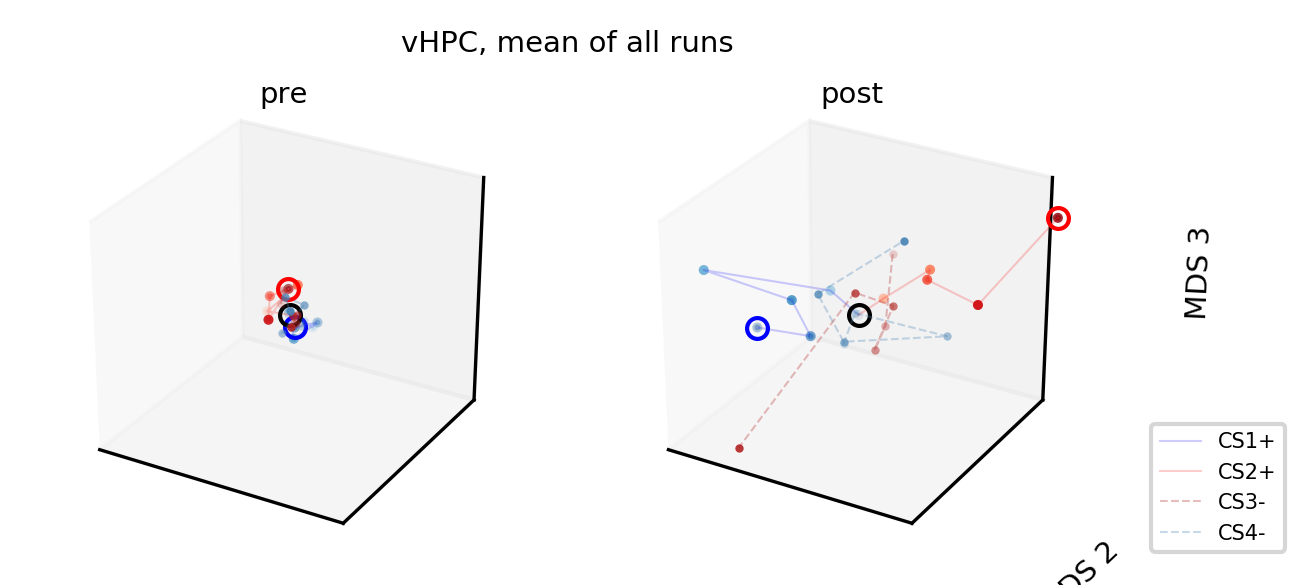

In [87]:
lim=1

fig = pl.figure(figsize=(4, 2))

for i in range(2):
       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    #ax.view_init(azim=10, elev=20)

    plot_mds_trajectory_3d(ax, labels_comb, session=sessions[i], tb=range(0,6), symbol1='o',symbol2='o',CSm=True)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("vHPC, mean of all runs",fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')


fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

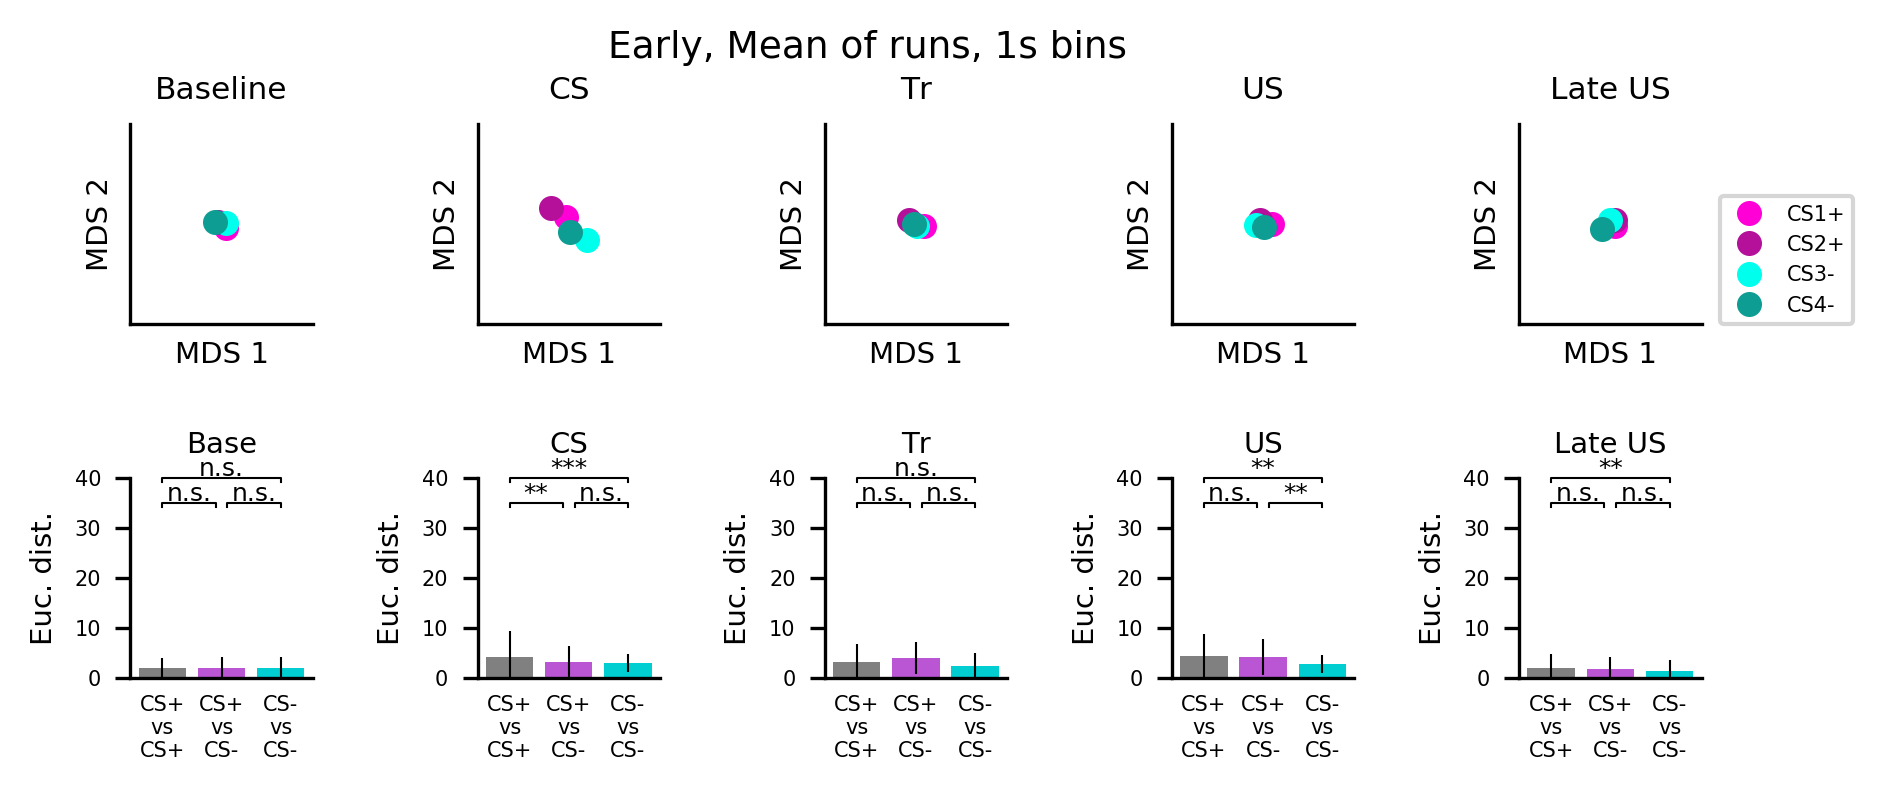

In [41]:
fig, axs = pl.subplots(2, 5, figsize=(6, 2.7), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']

for t,q,ti in zip([3,6,8,10,12],range(5),['Baseline','CS','Tr','US','Late US']):
    plot_mds(axs[0][q], eval("patterns_tb_%s_pre_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 1.3
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    
for t,c,ti in zip([3,6,8,10,12],range(len(range(5))),['Base','CS','Tr','US','Late US']):
        for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[1][c].bar(f,eval("d_pre_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[1][c].set_xticks(range(3))
            axs[1][c].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            axs[1][c].tick_params(axis='x',length=.5,bottom=False)
            axs[1][c].set_ylabel('Euc. dist.')
            axs[1][c].set_title(ti)
            axs[1][c].set_ylim(0,40)
pvs=[]
loops=15
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([3,6,8,10,12],range(len(range(5)))):
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35))
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,40))
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35))

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Early, Mean of runs, 1s bins",fontsize=9)

fig.tight_layout(pad=3)

fig.savefig('../img/%s_composite_Early.pdf'%NOTEBOOK_NAME, bbox='tight')

NameError: name 'patterns_tb_3_post_all_mds_mean' is not defined

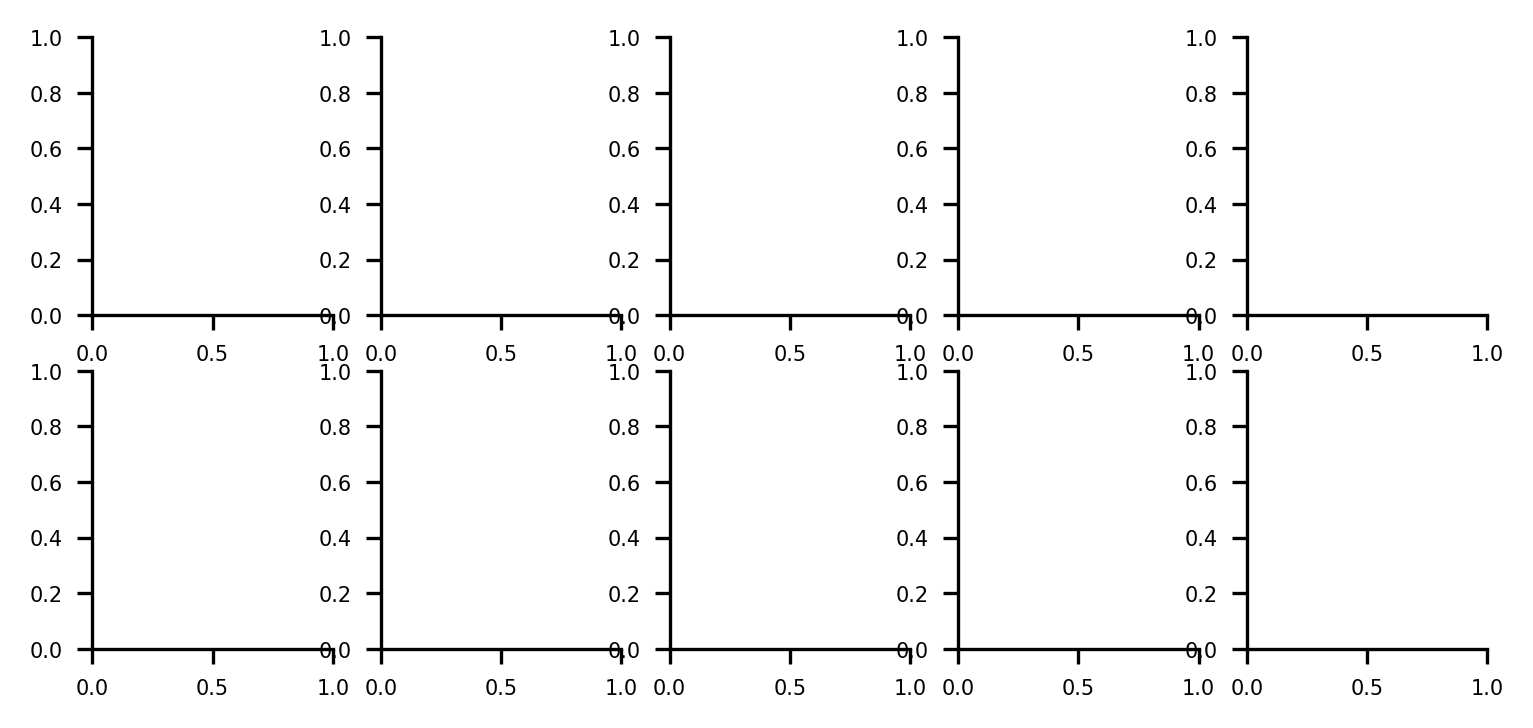

In [15]:
fig, axs = pl.subplots(2, 5, figsize=(6, 2.7), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']

for t,q,ti in zip([3,6,8,10,12],range(5),['Baseline','CS','Tr','US','Late US']):
    plot_mds(axs[0][q], eval("patterns_tb_%s_post_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 2
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    
for t,c,ti in zip([3,6,8,10,12],range(len(range(5))),['Base','CS','Tr','US','Late US']):
        for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[1][c].bar(f,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            if f==0:
                axs[1][c].scatter(f+np.random.random(50)*1/2-1/4.5,np.array(eval("d_post_tb_%s_%s[:50]"%(t,comp[0]+comp[1]))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            else:
                axs[1][c].scatter(f+np.random.random(50)*1/2-1/4.5,np.array(list(eval("d_post_tb_%s_%s.values()[:50]"%(t,comp[0]+comp[1])))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            axs[1][c].set_xticks(range(3))
            axs[1][c].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[1][c].tick_params(axis='x',length=.5,bottom=False)
            axs[1][c].set_ylabel('Euc. dist.')
            axs[1][c].set_title(ti)
            axs[1][c].set_ylim(0,40)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([3,6,8,10,12],range(len(range(5)))):
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,40,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35,mcc=2))
    print t,'+-/++',report_stats(eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],mcc=2)
    print t,'+-/--',report_stats(eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)
    print t,'++/--',report_stats(eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("MDS dimensionality reduction, dCA1 (Late)",fontsize=9)
fig.tight_layout(pad=3)

fig.savefig('../figures/%s_composite_Late.pdf'%NOTEBOOK_NAME, bbox='tight')

5 +-/++ U = 98.0 p = 0.000659677041556 r = 0.811348084539
None
5 +-/-- U = 100.0 p = 0.000365343582219 r = 0.845154254729
None
5 ++/-- U = 74.0 p = 0.151323144288 r = 0.40567404227
None
8 +-/++ U = 41.0 p = 1.04104576655 r = -0.152127765851
None
8 +-/-- U = 22.0 p = 0.0752706275746 r = -0.473286382648
None
8 ++/-- U = 27.0 p = 0.177946023404 r = -0.388770957175
None


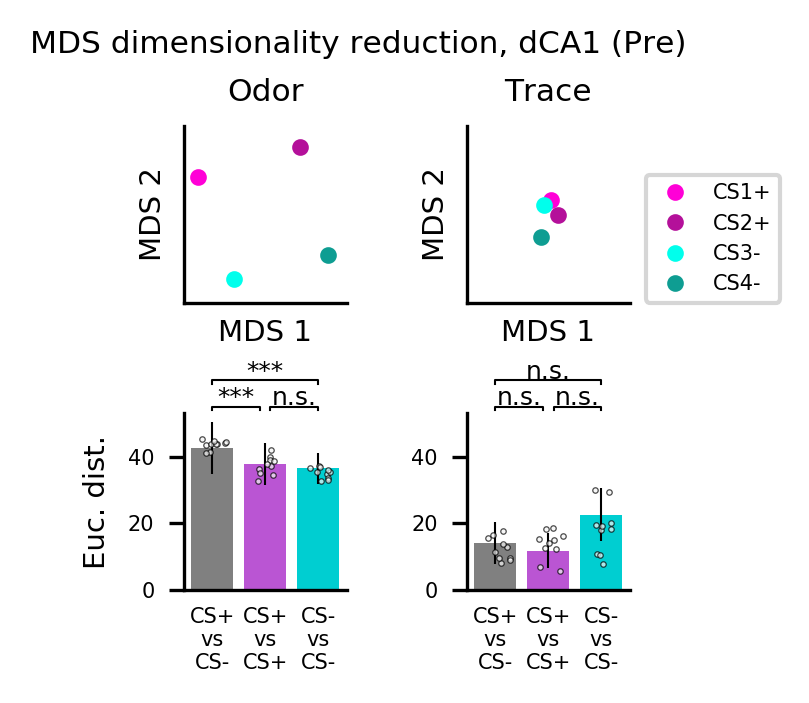

In [52]:
fig, axs = pl.subplots(2, 2, figsize=(2.25, 2.4), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']
which_run=2

for t,q,ti in zip([5,8],range(2),['Odor','Trace']):
    plot_mds(axs[0][q], eval("patterns_1s_expo_%s_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 30
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[1][q].bar(f,eval("d_expo_1s_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_expo_1s_%s_%s_std"%(t,comp[0]+comp[1])))
            if f==0:
                axs[1][q].scatter(f+np.random.random(loops)*1/2-1/4.5,np.array(eval("d_expo_1s_%s_%s_app[:loops]"%(t,comp[0]+comp[1]))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            else:
                axs[1][q].scatter(f+np.random.random(loops)*1/2-1/4.5,np.array(list(eval("d_expo_1s_%s_%s.values()[:loops]"%(t,comp[0]+comp[1])))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            axs[1][q].set_xticks(range(3))
            axs[1][q].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[1][q].tick_params(axis='x',length=.5,bottom=False)
            axs[1][0].set_ylabel('Euc. dist.')
            #axs[1][q].set_title(ti,y=1.2)
            axs[1][q].set_ylim(0,53)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([5,8],range(2)):
    pvs.append(add_significance(axs[1][c], eval("d_expo_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,55,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_expo_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,63,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_expo_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,55,mcc=2))
    print t,'+-/++',report_stats(eval("d_expo_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],mcc=2)
    print t,'+-/--',report_stats(eval("d_expo_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)
    print t,'++/--',report_stats(eval("d_expo_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_expo_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("MDS dimensionality reduction, dCA1 (Pre)",fontsize=7.5)
fig.tight_layout(pad=3)

fig.savefig('../figures/%s_composite_expo.pdf'%NOTEBOOK_NAME, bbox='tight')

5 +-/++ U = 50.0 p = 1.93969995399 r = 0.0
None
5 +-/-- U = 25.0 p = 0.128044202566 r = -0.422577127364
None
5 ++/-- U = 26.0 p = 0.151323144288 r = -0.40567404227
None
8 +-/++ U = 100.0 p = 0.000365343582219 r = 0.845154254729
None
8 +-/-- U = 100.0 p = 0.000365343582219 r = 0.845154254729
None
8 ++/-- U = 21.0 p = 0.0624180255435 r = -0.490189467743
None


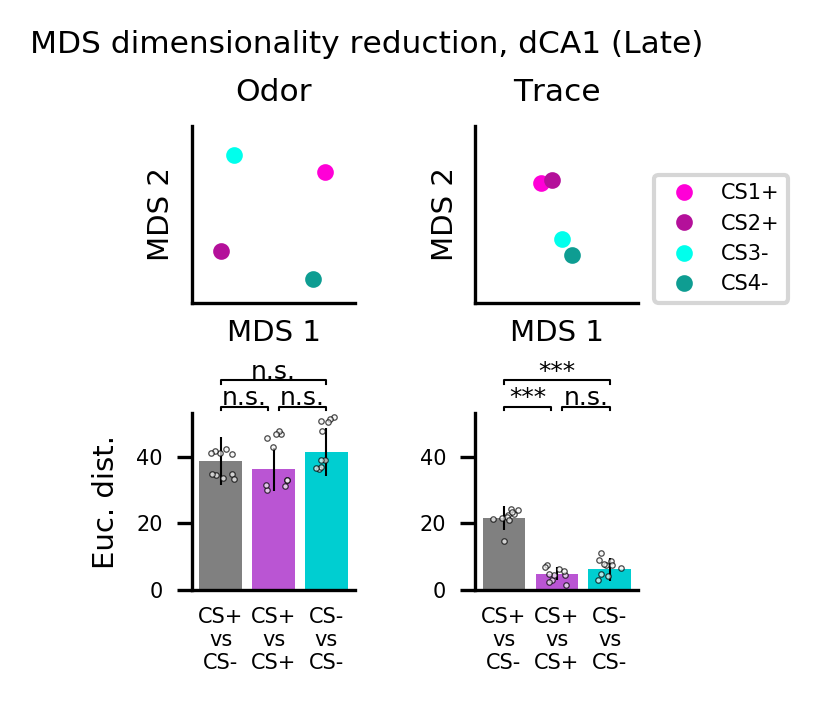

In [53]:
fig, axs = pl.subplots(2, 2, figsize=(2.25, 2.4), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']
which_run=3

for t,q,ti in zip([5,8],range(2),['Odor','Trace']):
    plot_mds(axs[0][q], eval("patterns_1s_post_%s_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 30
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[1][q].bar(f,eval("d_post_1s_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_1s_%s_%s_std"%(t,comp[0]+comp[1])))
            if f==0:
                axs[1][q].scatter(f+np.random.random(loops)*1/2-1/4.5,np.array(eval("d_post_1s_%s_%s_app[:loops]"%(t,comp[0]+comp[1]))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            else:
                axs[1][q].scatter(f+np.random.random(loops)*1/2-1/4.5,np.array(list(eval("d_post_1s_%s_%s.values()[:loops]"%(t,comp[0]+comp[1])))),
                                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.3,edgecolor='k')
            axs[1][q].set_xticks(range(3))
            axs[1][q].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[1][q].tick_params(axis='x',length=.5,bottom=False)
            axs[1][0].set_ylabel('Euc. dist.')
            #axs[1][q].set_title(ti,y=1.2)
            axs[1][q].set_ylim(0,53)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([5,8],range(2)):
    pvs.append(add_significance(axs[1][c], eval("d_post_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,55,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,63,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,55,mcc=2))
    print t,'+-/++',report_stats(eval("d_post_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],mcc=2)
    print t,'+-/--',report_stats(eval("d_post_1s_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)
    print t,'++/--',report_stats(eval("d_post_1s_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_1s_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],mcc=2)

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("MDS dimensionality reduction, dCA1 (Late)",fontsize=7.5)
fig.tight_layout(pad=3)

fig.savefig('../figures/%s_composite_Late.pdf'%NOTEBOOK_NAME, bbox='tight')

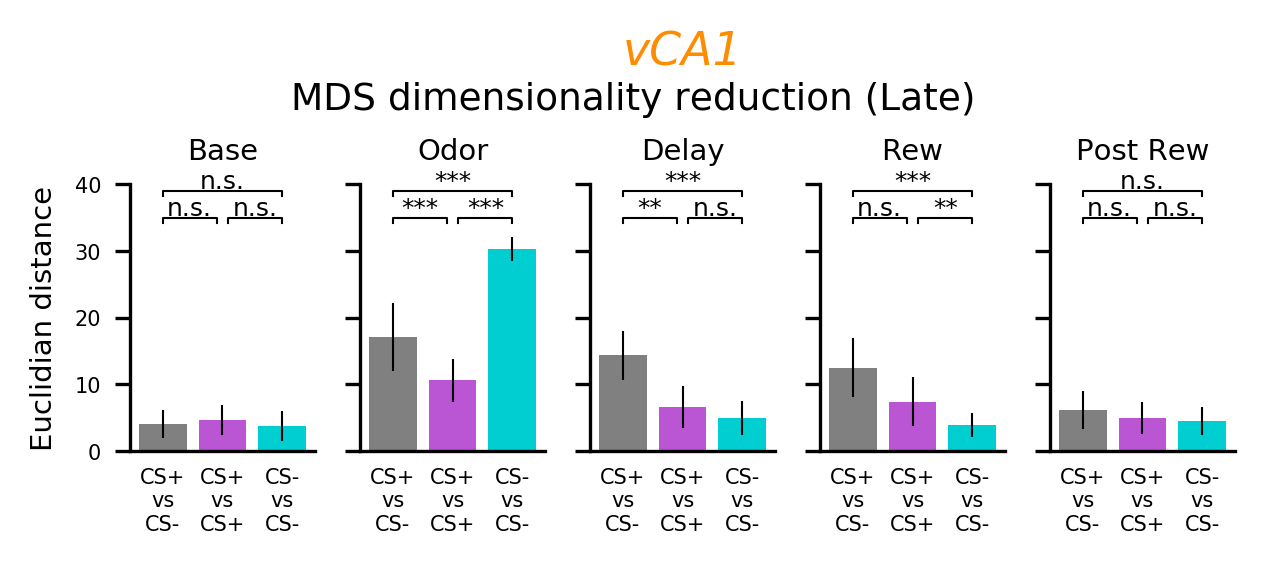

In [15]:
fig, axs = pl.subplots(1, 5, figsize=(4.3, 1.6), sharex=False, sharey=True)
colors=['gray','mediumorchid','darkturquoise']

    
for t,c,ti in zip([3,6,8,10,12],range(len(range(5))),['Base','Odor','Delay','Rew','Post Rew']):
        for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[c].bar(f,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[c].set_xticks(range(3))
            axs[c].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[c].tick_params(axis='x',length=.5,bottom=False)
            axs[0].set_ylabel('Euclidian distance')
            axs[c].set_title(ti)
            axs[c].set_ylim(0,40)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([3,6,8,10,12],range(len(range(5)))):
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35,mcc=2))
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,39,mcc=2))
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35,mcc=2))


pl.suptitle("MDS dimensionality reduction (Late)",fontsize=9,y=1.03)
axs[2].text(1,58,'dCA1',color='darkorange',fontsize=11,fontstyle='italic',ha='center')



fig.tight_layout(pad=2)

fig.savefig('../figures/%s_composite_Late_noMDS.pdf'%NOTEBOOK_NAME, bbox='tight')

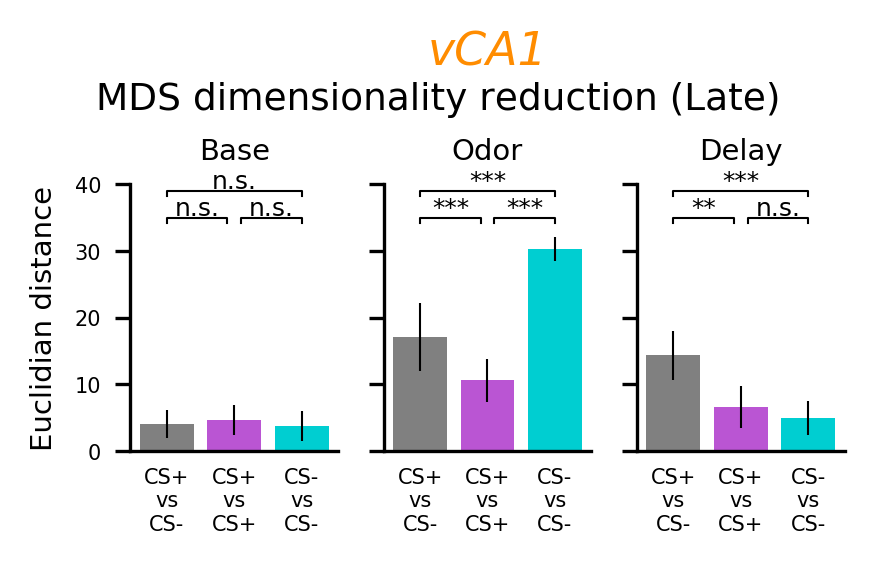

In [35]:
fig, axs = pl.subplots(1, 3, figsize=(3, 1.6), sharex=False, sharey=True)
colors=['gray','mediumorchid','darkturquoise']

    
for t,c,ti in zip([3,6,8,10,12],range(len(range(3))),['Base','Odor','Delay']):
        for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[c].bar(f,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[c].set_xticks(range(3))
            axs[c].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[c].tick_params(axis='x',length=.5,bottom=False)
            axs[0].set_ylabel('Euclidian distance')
            axs[c].set_title(ti)
            axs[c].set_ylim(0,40)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([3,6,8],range(len(range(3)))):
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35,mcc=2))
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,39,mcc=2))
    pvs.append(add_significance(axs[c], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35,mcc=2))


pl.suptitle("MDS dimensionality reduction (Late)",fontsize=9,y=1.03)
axs[1].text(1,58,'dCA1',color='darkorange',fontsize=11,fontstyle='italic',ha='center')



fig.tight_layout(pad=2)

fig.savefig('../figures/%s_composite_Late_noMDS_3.pdf'%NOTEBOOK_NAME, bbox='tight')

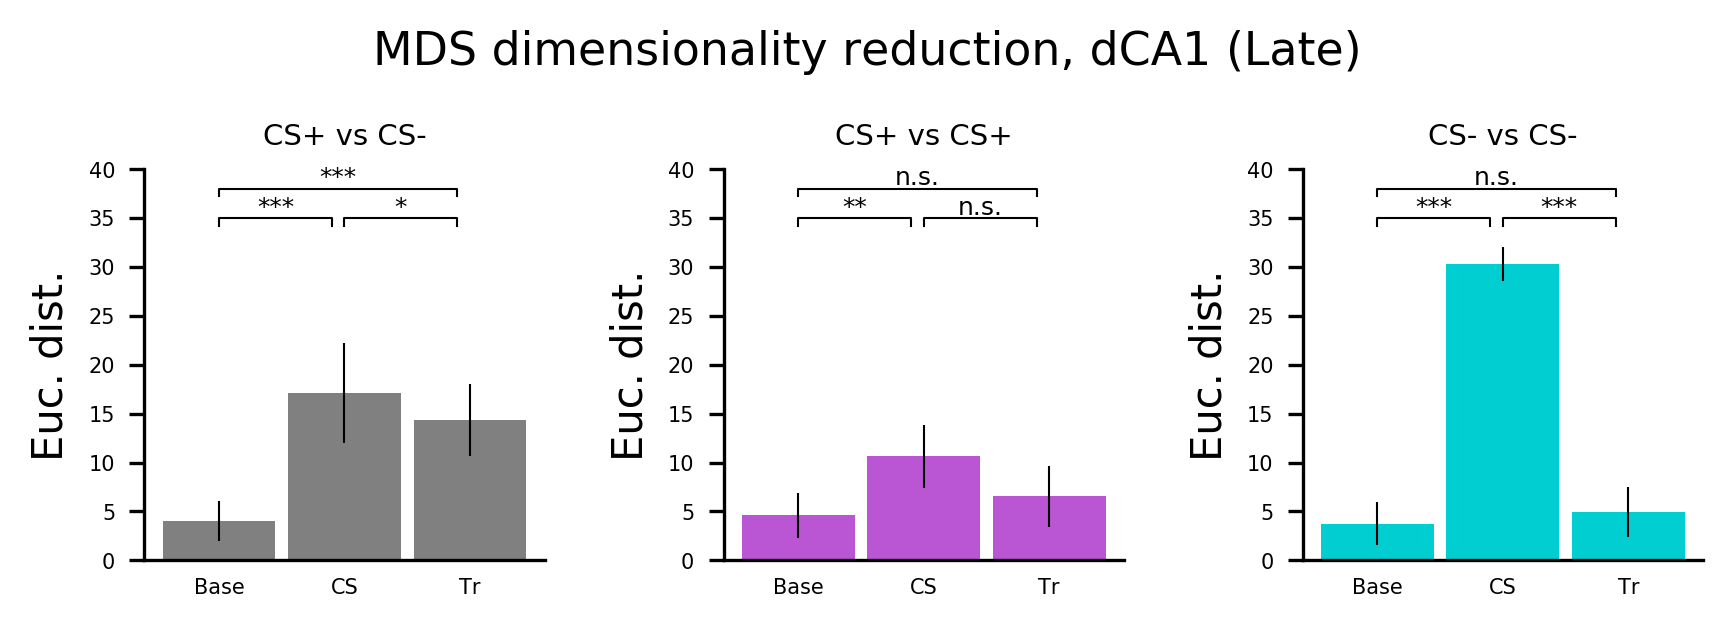

In [19]:
fig, axs = pl.subplots(1, 3, figsize=(6, 2), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']


for comp,f,ti in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3),['CS+ vs CS-','CS+ vs CS+','CS- vs CS-']):
    for t,c in zip([3,6,8],range(len(range(3)))):
            axs[f].bar(c,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],width=.9,
                       yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[f].set_xticks(range(3))
            axs[f].set_xticklabels(['Base','CS','Tr'])
            axs[f].tick_params(axis='x',length=.5,bottom=False)
            axs[f].set_ylabel('Euc. dist.',fontsize=10)
            axs[f].set_title(ti)
            axs[f].set_ylim(0,40)

pvs=[]
loops=10
ts=[3,6,8]
zs = [8]
comp =['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
#for t,c in zip([3,6,8,10,12],range(len(range(5)))):
for f in range(3):
    for t in range(2):
        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[t],comp[f][0]+comp[f][1]))[:loops],
            eval("d_post_tb_%s_%s_app"%(ts[t+1],comp[f][0]+comp[f][1]))[:loops],0+t,.9+t,35,mcc=2))
    for z in range(1):
        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[0],comp[f][0]+comp[f][1]))[:loops],
            eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],0,1.9+z,38+(0*7)+(z*3),mcc=2))
#    for z in range(1,3):
#        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[1],comp[f][0]+comp[f][1]))[:loops],
#            eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],1,1.9+z,22+(1*7)+(z*3)))
#    pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[2],comp[f][0]+comp[f][1]))[:loops],
#        eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],2,1.9+z,22+(2*7)+(1*3)))

pl.suptitle("MDS dimensionality reduction, dCA1 (Late)",fontsize=11,y=1.05)

fig.tight_layout(pad=3)

fig.savefig('../figures/%s_euclid_comparisons_Late.pdf'%NOTEBOOK_NAME, bbox='tight')

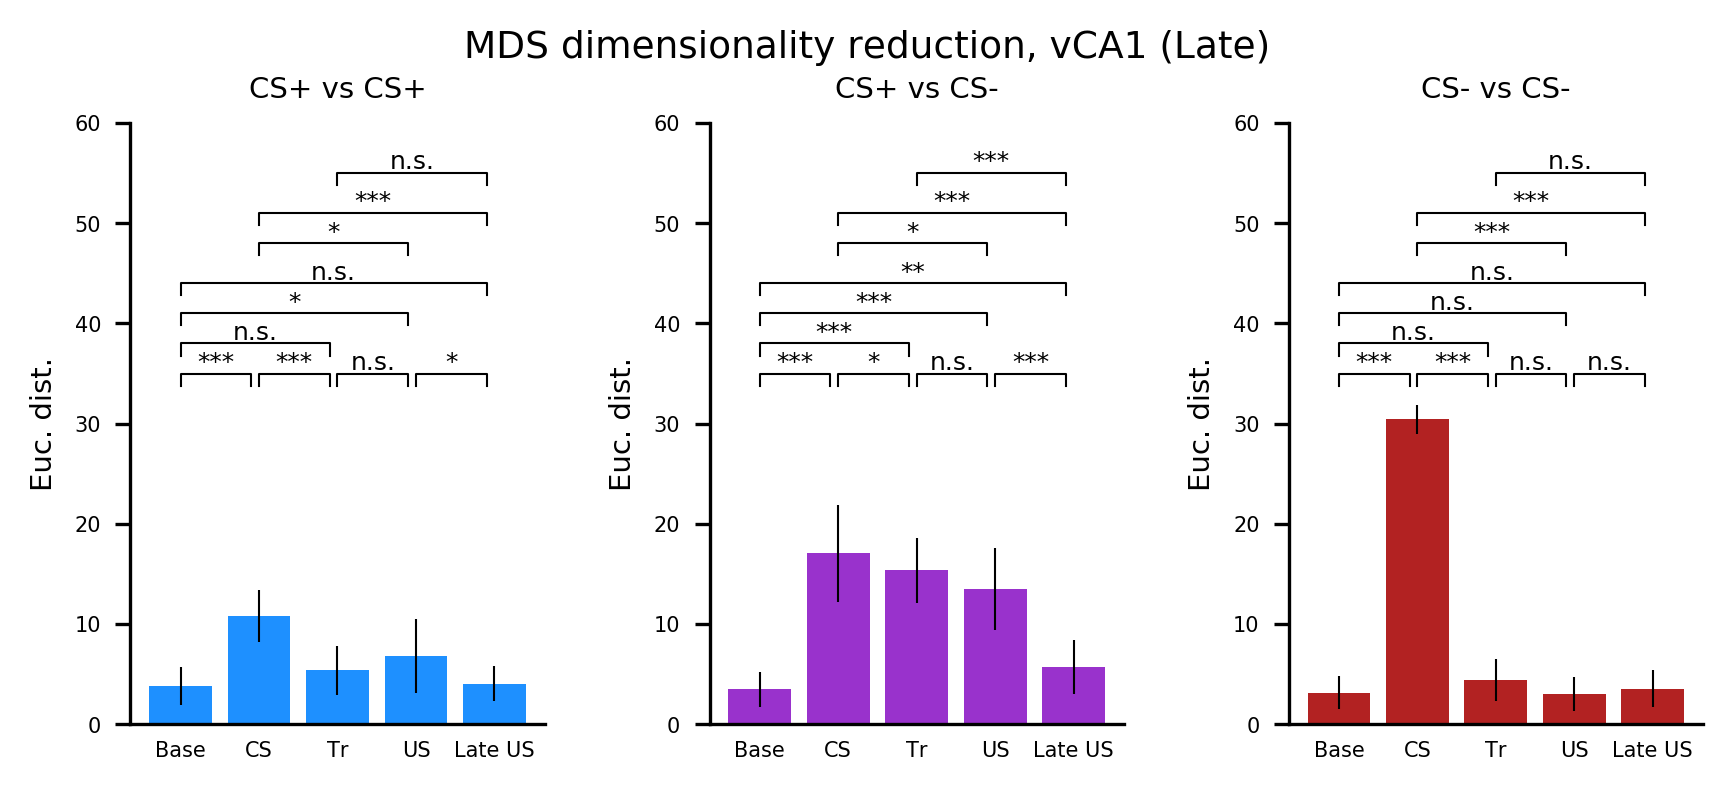

In [41]:
fig, axs = pl.subplots(1, 3, figsize=(6, 2.7), sharex=False, sharey=False)
colors=['dodgerblue','darkorchid','firebrick']


for comp,f,ti in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3),['CS+ vs CS+','CS+ vs CS-','CS- vs CS-']):
    for t,c in zip([3,6,8,10,12],range(len(range(5)))):
            axs[f].bar(c,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[f].set_xticks(range(5))
            axs[f].set_xticklabels(['Base','CS','Tr','US','Late US'])
            axs[f].tick_params(axis='x',length=.5,bottom=False)
            axs[f].set_ylabel('Euc. dist.')
            axs[f].set_title(ti)
            axs[f].set_ylim(0,60)

pvs=[]
loops=15
ts=[3,6,8,10,12]
zs = [8,10,12]
comp = ['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']
#for t,c in zip([3,6,8,10,12],range(len(range(5)))):
for f in range(3):
    for t in range(4):
        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[t],comp[f][0]+comp[f][1]))[:loops],
            eval("d_post_tb_%s_%s_app"%(ts[t+1],comp[f][0]+comp[f][1]))[:loops],0+t,.9+t,35))
    for z in range(3):
        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[0],comp[f][0]+comp[f][1]))[:loops],
            eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],0,1.9+z,38+(0*7)+(z*3)))
    for z in range(1,3):
        pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[1],comp[f][0]+comp[f][1]))[:loops],
            eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],1,1.9+z,38+(1*7)+(z*3)))
    pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(ts[2],comp[f][0]+comp[f][1]))[:loops],
        eval("d_post_tb_%s_%s_app"%(zs[z],comp[f][0]+comp[f][1]))[:loops],2,1.9+z,38+(2*7)+(1*3)))
           # pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
           #     eval("d_post_tb_%s_%s_app"%(c+ts.index(t),comp[2][0]+comp[2][1]))[:loops],0,2,40))
           # pvs.append(add_significance(axs[f], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
           #     eval("d_post_tb_%s_%s_app"%(c+ts.index(t),comp[2][0]+comp[2][1]))[:loops],1.1,2,35))

pl.suptitle("MDS dimensionality reduction, dCA1 (Late)",fontsize=9)




fig.tight_layout(pad=3)

fig.savefig('../img/%s_euclid_comparisons_Late.jpg'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm = get_euclid_dist(prepost_patterns_all_mds[10], labels_comb[10])

In [ ]:
for x,y in zip(range(6),(dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm)):
    pl.bar(x,y)
pl.xticks(range(6),('prepost\nCS-', 'prepost\nCS+','prepost\nCS+CS-', 'prepost\nCS-CS+', 'prepre\nCS+CS-', 'postpost\nCS+CS-'))

In [39]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'distance'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'time'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
